In [336]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Reshape, Flatten, Conv2DTranspose, Conv2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [337]:
data = pd.read_csv('/content/captions.csv')
df = pd.DataFrame(data)

In [338]:
df.shape

(833, 1)

In [339]:
data.head()

,caption
0,a drawing of a green pokemon with red eyes
1,a green and yellow toy with a red nose
2,a red and white ball with an angry look on its...
3,a cartoon ball with a smile on it's face
4,a bunch of balls with faces drawn on them


In [340]:
sentences = []
for i in range((df.shape[0]) - 1):
  sentences.append(df.caption[i])
sentences

['a drawing of a green pokemon with red eyes',
 'a green and yellow toy with a red nose',
 'a red and white ball with an angry look on its face',
 "a cartoon ball with a smile on it's face",
 'a bunch of balls with faces drawn on them',
 'a cartoon character with a potted plant on his head',
 'a drawing of a pokemon stuffed animal',
 'a picture of a cartoon character with a sword',
 'a drawing of a cartoon character doing a kick',
 'a drawing of a girl with a boxing glove',
 'a picture of a pink and yellow pokemon figure',
 'a purple ball with a skull and cross bones on it',
 'a cartoon picture of a green vegetable with eyes',
 'an image of a cartoon character flying through the air',
 'a drawing of a gray and black dragon',
 'a drawing of a gray and yellow pokemon',
 'a pink bird sitting on top of a white surface',
 'a blue and black object with two eyes',
 'a couple of pokemon standing next to each other',
 'a cartoon picture of a bear holding a baseball bat',
 'a drawing of a blue d

In [341]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [342]:
# Tokenize and create sequences
tokenizer = Tokenizer()  #converts text data into a numerical representation
tokenizer.fit_on_texts(sentences)  #takes the sentences as input, processes them, and builds a vocabulary based on the unique words present in the sentences
sequences = tokenizer.texts_to_sequences(sentences)  #Each sentence in the sentences list is now represented as a sequence of integers, where each integer corresponds to the index of the word in the tokenizer's vocabulary.
# for i in range((df.shape[0]) - 1):
#   print(sequences)

In [343]:
# Get the word index
word_index = tokenizer.word_index  #word_index dictionary maps each word in the vocabulary to its corresponding integer index.

# Define the maximum sequence length after padding
max_sequence_length = 20

# Pad sequences to make them of equal length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)  #to ensure that all sequences have the same length by either padding or truncating them.

for sequence in padded_sequences:
    print(sequence)

[ 0  0  0  0  0  0  0  0  0  0  0  1  6  3  1 15 11  2 20 13]
[  0   0   0   0   0   0   0   0   0   0   0   1  15   5  12 140   2   1
  20  51]
[  0   0   0   0   0   0   0   0   1  20   5  10  52   2  46 122  71   8
  14  39]
[ 0  0  0  0  0  0  0  0  0  0  0  1  4 52  2  1 45  8 36 39]
[  0   0   0   0   0   0   0   0   0   0   0   1 225   3 141   2 226 227
   8 164]
[  0   0   0   0   0   0   0   0   0   0   1   4   7   2   1 228 123   8
  31  22]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  6  3  1 11 86 23]
[ 0  0  0  0  0  0  0  0  0  0  0  1 34  3  1  4  7  2  1 87]
[  0   0   0   0   0   0   0   0   0   0   0   1   6   3   1   4   7 229
   1 230]
[  0   0   0   0   0   0   0   0   0   0   0   1   6   3   1 165   2   1
 166 167]
[  0   0   0   0   0   0   0   0   0   0   0   1  34   3   1  18   5  12
  11 231]
[  0   0   0   0   0   0   0   0   0   1  37  52   2   1 232   5 124 233
   8  47]
[  0   0   0   0   0   0   0   0   0   0   0   1   4  34   3   1  15 234
   2  13]
[ 0  

In [344]:
# Train Word2Vec model on the preprocessed text data
embedding_dim = 100
# Convert sequences back to sentences (list of words)
tokenized_sentences = []
for sequence in padded_sequences:
    sentence = tokenizer.sequences_to_texts([sequence])[0].lower()   #converts a sequence of integers back to a sentence (as a string)
    tokenized_sentences.append(sentence.split())  #splits the sentence string into a list of individual words.

# Print each sentence separately
for sentence in tokenized_sentences:
    print(sentence)

word2vec_model = Word2Vec(tokenized_sentences, vector_size=embedding_dim, window=10, min_count=1, workers=4)

['a', 'drawing', 'of', 'a', 'green', 'pokemon', 'with', 'red', 'eyes']
['a', 'green', 'and', 'yellow', 'toy', 'with', 'a', 'red', 'nose']
['a', 'red', 'and', 'white', 'ball', 'with', 'an', 'angry', 'look', 'on', 'its', 'face']
['a', 'cartoon', 'ball', 'with', 'a', 'smile', 'on', "it's", 'face']
['a', 'bunch', 'of', 'balls', 'with', 'faces', 'drawn', 'on', 'them']
['a', 'cartoon', 'character', 'with', 'a', 'potted', 'plant', 'on', 'his', 'head']
['a', 'drawing', 'of', 'a', 'pokemon', 'stuffed', 'animal']
['a', 'picture', 'of', 'a', 'cartoon', 'character', 'with', 'a', 'sword']
['a', 'drawing', 'of', 'a', 'cartoon', 'character', 'doing', 'a', 'kick']
['a', 'drawing', 'of', 'a', 'girl', 'with', 'a', 'boxing', 'glove']
['a', 'picture', 'of', 'a', 'pink', 'and', 'yellow', 'pokemon', 'figure']
['a', 'purple', 'ball', 'with', 'a', 'skull', 'and', 'cross', 'bones', 'on', 'it']
['a', 'cartoon', 'picture', 'of', 'a', 'green', 'vegetable', 'with', 'eyes']
['an', 'image', 'of', 'a', 'cartoon', 'ch

In [345]:
# Map text sentences to Word2Vec embeddings
def map_text_to_word2vec(sentences, word2vec_model):   #maps each word in the sentences to their corresponding Word2Vec embeddings
    embeddings = []
    for sentence in sentences:
        sentence_embeddings = []
        for word in sentence:
            if word in word2vec_model.wv:
                sentence_embeddings.append(word2vec_model.wv[word])
            else:
                sentence_embeddings.append(np.zeros(embedding_dim))  # Use zero vectors for unknown words
        embeddings.append(sentence_embeddings)
    return embeddings

text_embeddings = map_text_to_word2vec(tokenized_sentences, word2vec_model)

In [346]:
# Convert text_embeddings to numpy array
text_embeddings = np.array(text_embeddings)

<ipython-input-346-22045a5e610a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_embeddings = np.array(text_embeddings)


In [347]:
import cv2
import os

In [348]:
# Load and preprocess real images

image_data_path = '/content/drive/MyDrive/Images.npy'
image_width, image_height = 64, 64

# Load the image data from the numpy file
image_data = np.load(image_data_path, allow_pickle=True)

# Resize and normalize the images
resized_images = []
for img in image_data:
    # Resize the image to the desired width and height (64x64)
    img = cv2.resize(img, (image_width, image_height))

    # Normalize the image to values in the range [0, 1]
    img = img / 255.0

    resized_images.append(img)

# Convert the list of images to a numpy array
image_data = np.array(resized_images)

In [349]:
image_data.shape

(833, 64, 64, 3)

In [350]:
from tensorflow.keras.layers import Concatenate, Dense, Reshape, Conv2DTranspose
from tensorflow.keras import Input, Model

def build_generator():
    text_embedding_input = Input(shape=(embedding_dim,))  # Input layer for text embeddings
    noise_input = Input(shape=(100,))

    # Expand the dimensions of text_embedding_input to match the shape of noise_input
    text_embedding_expanded = tf.keras.backend.expand_dims(text_embedding_input, axis=1)
    text_embedding_expanded = tf.keras.backend.expand_dims(text_embedding_expanded, axis=1)
    #expands the dimensions of the text_embedding_input tensor to match the shape of the noise_input.
    #then flatten the expanded tensor to have the same shape as the noise_input, which is necessary to concatenate them later.

    # Flatten the text_embedding_expanded tensor to match the shape of noise_input
    text_embedding_flat = Reshape((100,))(text_embedding_expanded)

    # Combine the text embedding and noise using Concatenate layer
    concatenated_input = Concatenate()([text_embedding_flat, noise_input])

    generator = Sequential()
    generator.add(Dense(128, input_dim=embedding_dim + 100))  # Combine both inputs
    generator.add(Reshape((1, 1, 128)))
    generator.add(Conv2DTranspose(128, (4, 4), strides=(4, 4)))
    generator.add(Conv2DTranspose(64, (4, 4), strides=(4, 4)))
    generator.add(Conv2DTranspose(3, (4, 4), strides=(4, 4), activation='sigmoid'))
    # Output a generated image
    generated_image = generator(concatenated_input)
    upsampled_image = generated_image

    return Model(inputs=[text_embedding_input, noise_input], outputs=upsampled_image)

In [351]:
generator = build_generator()
generator.summary()

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_65 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 tf.expand_dims_48 (TFOpLambda)  (None, 1, 100)      0           ['input_65[0][0]']               
                                                                                                  
 tf.expand_dims_49 (TFOpLambda)  (None, 1, 1, 100)   0           ['tf.expand_dims_48[0][0]']      
                                                                                                  
 reshape_48 (Reshape)           (None, 100)          0           ['tf.expand_dims_49[0][0]']      
                                                                                           

1/1 [==============================] - 0s 101ms/step


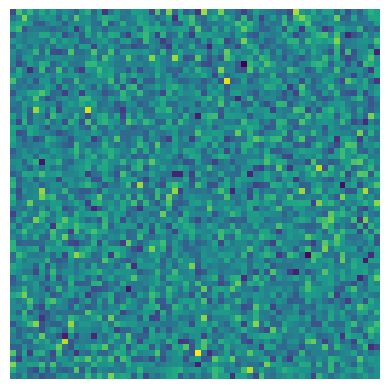

In [352]:
import matplotlib.pyplot as plt

generator_model = build_generator()

text_embeddings1 = np.random.rand(embedding_dim)

noise_input = np.random.rand(100)

# Generate the image using the untrained generator
upsampled_image= generator_model.predict([text_embeddings1.reshape(1, -1), noise_input.reshape(1, -1)])

# Plot the generated image
plt.imshow(upsampled_image[0])
plt.axis('off')
plt.imshow(upsampled_image[0, :, :, 0])

In [353]:
upsampled_image.shape

(1, 64, 64, 3)

In [354]:
def build_discriminator():
    discriminator = Sequential()
    discriminator.add(Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(64, 64, 3)))
    discriminator.add(Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    discriminator.add(Flatten())
    discriminator.add(Dense(1, activation='sigmoid'))
    return discriminator

In [355]:
discriminator = build_discriminator()
decision = discriminator(upsampled_image)
print (decision)

tf.Tensor([[0.50684196]], shape=(1, 1), dtype=float32)


In [356]:
discriminator.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        3136      
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 128)       131200    
                                                                 
 flatten_16 (Flatten)        (None, 32768)             0         
                                                                 
 dense_42 (Dense)            (None, 1)                 32769     
                                                                 
Total params: 167,105
Trainable params: 167,105
Non-trainable params: 0
_________________________________________________________________


In [357]:
generator_model = build_generator()
discriminator_model = build_discriminator()

In [358]:
def build_gan(generator, discriminator):
    discriminator.trainable = False

    text_embedding_input = Input(shape=(embedding_dim,))
    noise_input = Input(shape=(100,))

    # Generate an image using the generator with text embeddings and noise as input
    upsampled_image = generator([text_embedding_input, noise_input])

    gan_output = discriminator(upsampled_image)

    # Create the GAN model
    gan_model = Model(inputs=[text_embedding_input, noise_input], outputs=gan_output)

    return gan_model

In [359]:
# Build the complete GAN model
gan_model = build_gan(generator_model, discriminator_model)

In [360]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [361]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), tf.sigmoid(real_output))
    fake_loss = cross_entropy(tf.zeros_like(fake_output), tf.sigmoid(fake_output))
    total_loss = real_loss + fake_loss
    return total_loss

In [362]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), tf.sigmoid(fake_output))

In [363]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [364]:
import time
from IPython import display

In [365]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 1
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [366]:
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    text_embeddings = np.random.rand(BATCH_SIZE, embedding_dim)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator_model([text_embeddings, noise], training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_model.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [367]:

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        display.clear_output(wait=True)
        generate_images(generator_model, epoch + 1, seed,BATCH_SIZE, 1)

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_images(generator_model, epochs, seed,BATCH_SIZE, 1)


In [368]:
def generate_images(model, epoch, test_input, batch_size, examples_to_generate):
    # 'training' is set to False.
    # This is so all layers run in inference mode (batchnorm).
    text_embeddings = np.random.rand(examples_to_generate, embedding_dim)
    noise = tf.random.normal([examples_to_generate, noise_dim])

    predictions = model([text_embeddings, noise], training=False)

    num_rows = int(np.sqrt(examples_to_generate))
    num_cols = int(np.ceil(examples_to_generate / num_rows))

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5)
        plt.axis('off')
    plt.show()

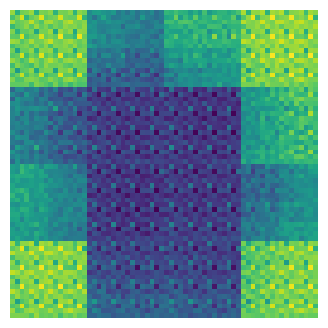

In [369]:
BATCH_SIZE = 32
train_dataset = tf.data.Dataset.from_tensor_slices(image_data).shuffle(len(image_data)).batch(BATCH_SIZE)
train(train_dataset, EPOCHS)

In [370]:
def generate_images_from_text(text_embeddings, num_images=5):

    noise = tf.random.normal([num_images, noise_dim])

    generated_images = generator_model([text_embeddings, noise], training=False)

    return generated_images


sentences = [
    'a cartoon character with a lightning bolt',
    'a cartoon character with a pink nose and purple hair',
    'a drawing of a pokemon with a big smile',
    'a drawing of a pink and blue pokemon',
    'a drawing of a pokemon with a blue hat.'
]

In [371]:
# Tokenize and create sequences
tokenizer = Tokenizer()  #converts text data into a numerical representation
tokenizer.fit_on_texts(sentences)  #takes the sentences as input, processes them, and builds a vocabulary based on the unique words present in the sentences
sequences = tokenizer.texts_to_sequences(sentences)  #Each sentence in the sentences list is now represented as a sequence of integers, where each integer corresponds to the index of the word in the tokenizer's vocabulary.
# for i in range((df.shape[0]) - 1):
#   print(sequences)

In [372]:
# Get the word index
word_index = tokenizer.word_index  #word_index dictionary maps each word in the vocabulary to its corresponding integer index.

# Define the maximum sequence length after padding
max_sequence_length = 20

# Pad sequences to make them of equal length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)  #to ensure that all sequences have the same length by either padding or truncating them.

for sequence in padded_sequences:
    print(sequence)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  6  7  2  1 11 12]
[ 0  0  0  0  0  0  0  0  0  0  1  6  7  2  1  8 13  9 14 15]
[ 0  0  0  0  0  0  0  0  0  0  0  1  3  4  1  5  2  1 16 17]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  3  4  1  8  9 10  5]
[ 0  0  0  0  0  0  0  0  0  0  0  1  3  4  1  5  2  1 10 18]


In [373]:
# Train Word2Vec model on the preprocessed text data
embedding_dim = 100
# Convert sequences back to sentences (list of words)
tokenized_sentences = []
for sequence in padded_sequences:
    sentence = tokenizer.sequences_to_texts([sequence])[0].lower()   #converts a sequence of integers back to a sentence (as a string)
    tokenized_sentences.append(sentence.split())  #splits the sentence string into a list of individual words.

# Print each sentence separately
for sentence in tokenized_sentences:
    print(sentence)

word2vec_model = Word2Vec(tokenized_sentences, vector_size=embedding_dim, window=10, min_count=1, workers=4)

['a', 'cartoon', 'character', 'with', 'a', 'lightning', 'bolt']
['a', 'cartoon', 'character', 'with', 'a', 'pink', 'nose', 'and', 'purple', 'hair']
['a', 'drawing', 'of', 'a', 'pokemon', 'with', 'a', 'big', 'smile']
['a', 'drawing', 'of', 'a', 'pink', 'and', 'blue', 'pokemon']
['a', 'drawing', 'of', 'a', 'pokemon', 'with', 'a', 'blue', 'hat']


In [374]:
# Map text sentences to Word2Vec embeddings
def map_text_to_word2vec(sentences, word2vec_model):   #maps each word in the sentences to their corresponding Word2Vec embeddings
    embeddings = []
    for sentence in sentences:
        sentence_embeddings = []
        for word in sentence:
            if word in word2vec_model.wv:
                sentence_embeddings.append(word2vec_model.wv[word])
            else:
                sentence_embeddings.append(np.zeros(embedding_dim))  # Use zero vectors for unknown words
        embeddings.append(sentence_embeddings)
    return embeddings

text_embeddings = map_text_to_word2vec(tokenized_sentences, word2vec_model)

In [375]:
# Convert text_embeddings to numpy array
text_embeddings1 = np.array(text_embeddings)

<ipython-input-375-ed2ac347fe51>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_embeddings1 = np.array(text_embeddings)


In [376]:

# Pad or truncate text_embeddings1 to have the same number of words in each sentence
text_embeddings_reshaped = pad_sequences(text_embeddings1, maxlen=max_sequence_length, dtype='float32')


# Reshape text_embeddings_reshaped to be 2D array with shape (num_sentences, embedding_dim)
text_embeddings_flat = text_embeddings_reshaped.reshape(-1, embedding_dim)

num_images_to_generate = len(sentences)
generated_images = []

# Generate images for each sentence separately
for i in range(num_images_to_generate):
    # Generate noise for each sentence
    noise = np.random.rand(1, noise_dim)

    # Get the text embedding for the current sentence
    text_embedding = text_embeddings_flat[i]

    # Generate the image using the untrained generator
    upsampled_image = generator_model.predict([text_embedding.reshape(1, -1), noise])
    generated_images.append(upsampled_image)

# Convert the list of generated images to a numpy array
generated_images = np.array(generated_images)


1/1 [==============================] - 0s 17ms/step


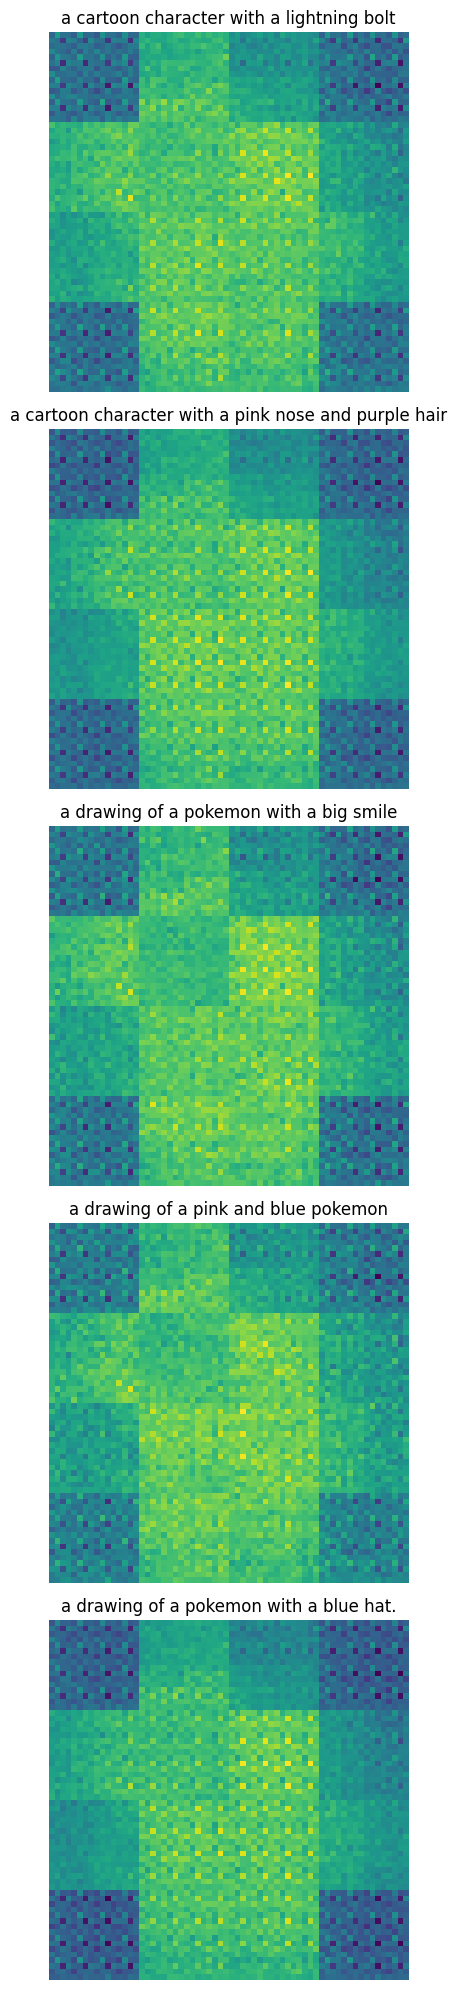

In [377]:
def plot_generated_images(generated_images, sentences):
    num_rows = len(generated_images)
    num_cols = 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(4, 4*num_rows))

    for i in range(num_rows):
        axes[i].imshow(generated_images[i][0, :, :, 0] * 127.5 + 127.5)
        axes[i].axis('off')
        axes[i].set_title(sentences[i])

    plt.tight_layout()
    plt.show()

# Plot the generated images
plot_generated_images(generated_images, sentences)